In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(current_dir)))
sys.path.append(parent_dir)
import streamProps
import math

class Format:
    end = '\033[0m'
    underline = '\033[4m'

In [2]:
print(Format.underline + "COLD STREAMS" + Format.end + "(from ASPEN HYSYS)")
cold1_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 71.9000, 1.19669000000000*1e5, 9262.50558361900/3600, "R11")
cold1_In.printState()
cold1_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 110.999992, 1.15049*1e5, cold1_In.M, "R12")
cold1_Out.printState()

cold2_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 70.47656572, 7.69685*1e5, 196767.825257385/3600, "R24")
cold2_In.printState()
cold2_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 102.389990755945, 7.59792*1e5, cold2_In.M, "R25")
cold2_Out.printState()

print(Format.underline + "HOT STREAMS" + Format.end + "(from ASPEN HYSYS)")
mainH2_In = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 106.00, 19.0015127000000*1e5, 20833.3333333333/3600, "F04")
mainH2_In.x_para = 0.1/(math.exp(-175/mainH2_In.T)+0.1) - 7.06*(10**-9)*(mainH2_In.T**3) \
                        + 3.42*(10**-6)*(mainH2_In.T**2) - 6.2*(10**-5)*mainH2_In.T - 0.00227
print("F04 p-H2 mole fraction: " + str(round(mainH2_In.x_para,3)))
mainH2_In.printState()
mainH2_Out = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 73.500, 19.0015127000000*1e5, mainH2_In.M, "F05")
mainH2_Out.printState()

hot_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 112.00, 29.60639*1e5, 138040.321663472/3600, "R03a")
hot_In.printState()
hot_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 74.00, 29.51433*1e5, hot_In.M, "R04")
hot_Out.printState()

COLD STREAMS(from ASPEN HYSYS)
Stream R11
M [kg/s]    =  2.5729
P [bar]     =  1.197
T [Kelvin]  =  71.9
H [kJ/kg]   =  998.331
S [kJ/kg.K] =  34.931


Stream R12
M [kg/s]    =  2.5729
P [bar]     =  1.15
T [Kelvin]  =  111.0
H [kJ/kg]   =  1429.682
S [kJ/kg.K] =  39.869


Stream R24
M [kg/s]    =  54.6577
P [bar]     =  7.697
T [Kelvin]  =  70.48
H [kJ/kg]   =  964.53
S [kJ/kg.K] =  26.841


Stream R25
M [kg/s]    =  54.6577
P [bar]     =  7.598
T [Kelvin]  =  102.39
H [kJ/kg]   =  1322.325
S [kJ/kg.K] =  31.076


HOT STREAMS(from ASPEN HYSYS)
F04 p-H2 mole fraction: 0.364
Stream F04
M [kg/s]    =  5.787
P [bar]     =  19.002
T [Kelvin]  =  106.0
H [kJ/kg]   =  1800.601
S [kJ/kg.K] =  36.045


Stream F05
M [kg/s]    =  5.787
P [bar]     =  19.002
T [Kelvin]  =  73.5
H [kJ/kg]   =  1296.523
S [kJ/kg.K] =  30.329


Stream R03a
M [kg/s]    =  38.3445
P [bar]     =  29.606
T [Kelvin]  =  112.0
H [kJ/kg]   =  1410.725
S [kJ/kg.K] =  26.282


Stream R04
M [kg/s]    =  38.3445
P [bar]     = 

In [3]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return abs(cold1_In.M*(cold1_In.H-cold1_Out.H) + x*(cold2_In.H-cold2_Out.H) + hot_In.M*(hot_In.H-hot_Out.H))

res = minimize_scalar(objective_function)
massFlow2A = res.x

cold2A_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, massFlow2A, "R24A")
cold2A_In.printState()
cold2B_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, cold2_In.M-massFlow2A, "R24B")
cold2B_In.printState()

Stream R24A
M [kg/s]    =  46.5054
P [bar]     =  7.697
T [Kelvin]  =  70.48
H [kJ/kg]   =  964.53
S [kJ/kg.K] =  26.841


Stream R24B
M [kg/s]    =  8.1523
P [bar]     =  7.697
T [Kelvin]  =  70.48
H [kJ/kg]   =  964.53
S [kJ/kg.K] =  26.841




In [4]:
nParallelHx = 5

lengthPFHX = 2.5802
widthPFHX = 1.5000
heightPFHX = 1.6205
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

print(Format.underline + "Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

lengthHXA     = 2.3735
widthHXA      = 1.5000
heightHXA     = 1.3085
volumeHXA     = lengthHXA*widthHXA*heightHXA

print(Format.underline + "HXA Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthHXA)
print("Width  [m]  = ", widthHXA)
print("Height [m]  = ", heightHXA)
print("Volume [m3] = ", round(volumeHXA,3))
print("\n")

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)
print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))
print("\n")

Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  2.5802
Width  [m]  =  1.5
Height [m]  =  1.6205
Volume [m3] =  6.272


HXA Geometry
(based on ASPEN EDR)
Length [m]  =  2.3735
Width  [m]  =  1.5
Height [m]  =  1.3085
Volume [m3] =  4.659


HXB Geometry
Length [m]  =  2.5802
Width  [m]  =  1.5
Height [m]  =  0.417
Volume [m3] =  1.613




Final HX-4 Geometry
Length [m]  =  7.5
Width  [m]  =  1.5
Height [m]  =  3.0
Volume [m3] =  33.75


HX-B Geometry
Length [m]  =  7.5
Width  [m]  =  1.5
Height [m]  =  2.586
Volume [m3] =  29.091

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          2.71e-01       5.55e-17          50             94       
       2          1.46e-06       0.00e+00          144             0       
Solved in 2 iterations, number of nodes 144. 
Maximum relative residual: 1.46e-06 
Maximum boundary residual: 0.00e+00


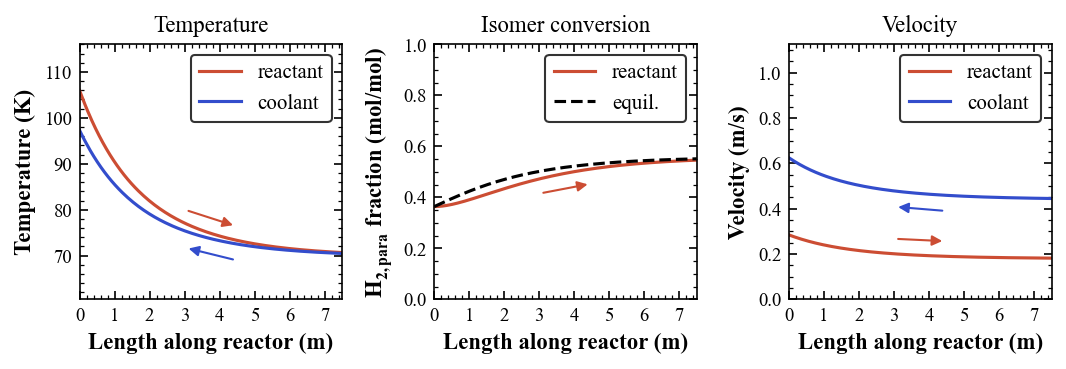

In [6]:
#Adjusted geometry
lengthPFHX = 7.500
widthPFHX  = 1.500
heightPFHX = 3.000
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4/nParallelHx, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4/nParallelHx,  # tonne-per-day
        'temperature':  cold2B_In.T,         # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000         # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,          # m
        'width': widthHXB,            # m
        'height': heightHXB,          # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Final HX-4 Geometry" + Format.end)
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

In [5]:
print(results)

        Z (m)  Reactant pressure (kPa)  Coolant pressure (kPa)  \
0    0.000000              1900.151270              769.369927   
1    0.076531              1900.009661              769.374178   
2    0.153061              1899.869801              769.378379   
3    0.204082              1899.777506              769.381153   
4    0.255102              1899.685947              769.383906   
..        ...                      ...                     ...   
139  7.244898              1890.272845              769.675606   
140  7.295918              1890.213416              769.677487   
141  7.346939              1890.154033              769.679367   
142  7.423469              1890.065041              769.682185   
143  7.500000              1889.976145              769.685000   

     Reactant temperature (K)  Coolant temperature (K)  \
0                  106.000000                97.060774   
1                  104.847271                96.178147   
2                  103.731240    